In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import nltk
import re
import seaborn as sns

In [3]:
data = pd.read_csv("Tweets.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
''' 
   Creating new datadrame consisting of airline_sentiment, airline_sentiment_confidence, airline, text, text_created, tweet location. 
'''

' \n   Creating new datadrame consisting of airline_sentiment, airline_sentiment_confidence, airline, text, text_created, tweet location. \n'

In [6]:
data.drop(columns=["tweet_id", "airline_sentiment_gold", "negativereason_gold", "user_timezone", "name", ],inplace=True)

In [7]:
data.drop(columns=["tweet_coord"], inplace=True)

In [8]:
data.duplicated().value_counts()

False    14601
True        39
dtype: int64

In [9]:
data.drop_duplicates(inplace=True)

Performing EDA

In [10]:
data.reset_index(inplace=True)

In [11]:
data.head(12041)

,index,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location
0,0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN
1,1,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN
2,2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play
3,3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN
4,4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN
...,...,...,...,...,...,...,...,...,...,...
12036,12036,positive,0.6242,NaN,0.0000,American,0,@AmericanAir Hopefully you ll see bad ones as ...,2015-02-19 15:25:12 -0800,"Sunnyside, NY"
12037,12037,negative,0.9240,Late Flight,0.4904,American,0,"@AmericanAir Okay, I think 1565 has waited lon...",2015-02-18 20:25:30 -0800,Texas
12038,12038,negative,1.0000,longlines,0.4686,Delta,0,@DeltaAssist now at 57 minutes waiting on Silv...,2015-02-24 10:49:27 -0800,Thataway
12039,12039,negative,0.7991,Can't Tell,0.6423,Delta,0,@DeltaAssist what I have to say is more than 1...,2015-02-20 05:02:50 -0800,NaN


In [12]:
type(data["airline_sentiment"].value_counts())

pandas.core.series.Series

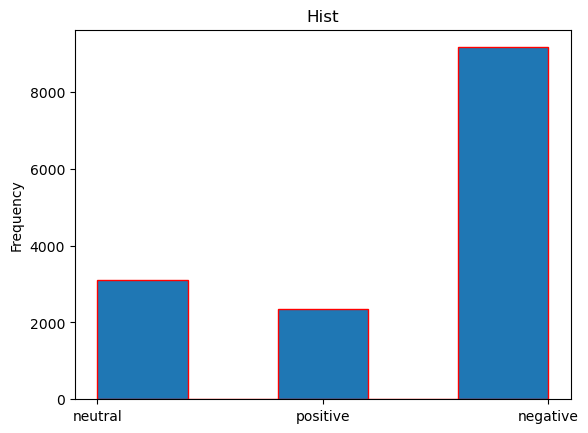

In [13]:
plt.hist(data["airline_sentiment"],bins=5,edgecolor="red")
plt.title("Hist")
plt.ylabel("Frequency")
plt.show()

In [14]:
airlines = data["airline"].value_counts()

In [15]:
airlines_names = {}
for i in airlines.keys():
    airlines_names[i] = {"positive":0, "negative" :0, "neutral":0}    

In [16]:
for i in range(0,data.shape[0]):
    airlines_names[data["airline"][i]][data["airline_sentiment"][i]] += 1

In [17]:
airlines_names

{'United': {'positive': 492, 'negative': 2633, 'neutral': 697},
 'US Airways': {'positive': 269, 'negative': 2263, 'neutral': 381},
 'American': {'positive': 326, 'negative': 1939, 'neutral': 455},
 'Southwest': {'positive': 570, 'negative': 1186, 'neutral': 664},
 'Delta': {'positive': 544, 'negative': 955, 'neutral': 723},
 'Virgin America': {'positive': 152, 'negative': 181, 'neutral': 171}}

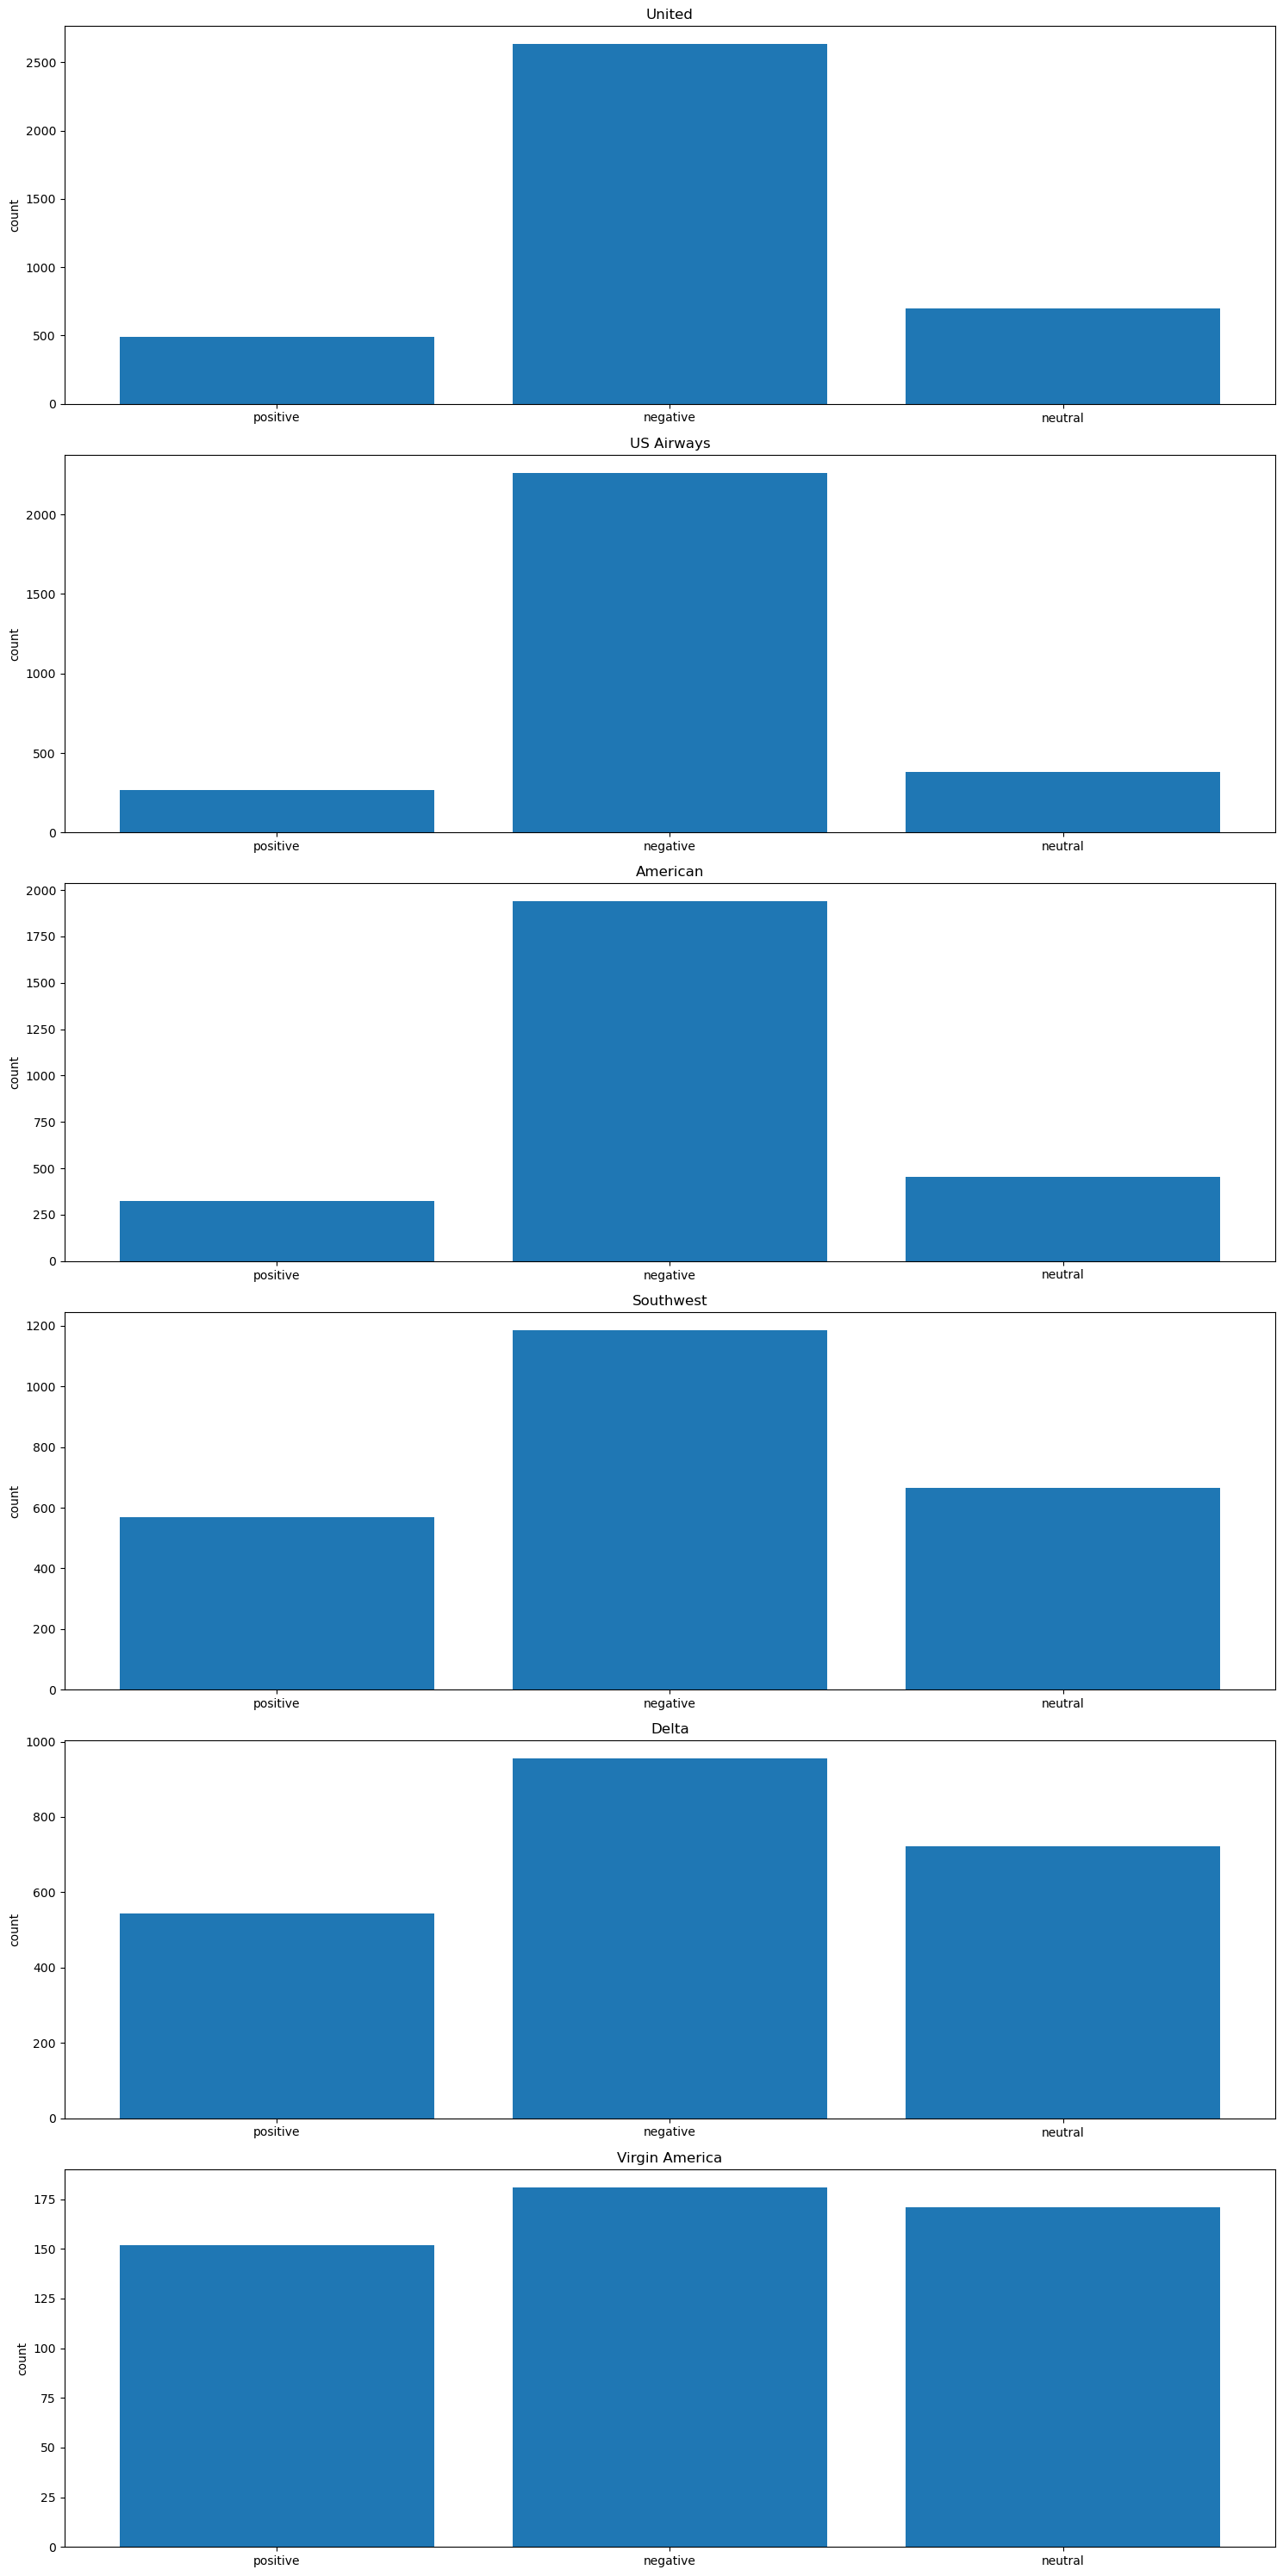

In [18]:
fig, axes = plt.subplots(6,1,figsize=(15,30))

for i,(airline, sentiment) in enumerate(airlines_names.items()):
    sentiment_types = list(sentiment.keys())
    sentiment_counts = list(sentiment.values())

    axes[i].bar(sentiment_types, sentiment_counts)
    axes[i].set_title(airline)
    axes[i].set_ylabel("count")


plt.tight_layout()
plt.show()

In [19]:
data['Timing'] = pd.to_datetime(data['tweet_created'], format='%Y-%m-%d %H:%M:%S %z')
data['year'] = data['Timing'].dt.year

In [20]:
data['month'] = data['Timing'].dt.month_name()
data['day'] = data['Timing'].dt.day
data['hour'] = data['Timing'].dt.hour
data['minute'] = data['Timing'].dt.minute

In [21]:
data.drop(columns=["tweet_location"], inplace=True)

In [22]:
data.drop(columns=["index"], inplace=True)

In [23]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

In [25]:
stopWords = set(stopwords.words("english"))

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14601 entries, 0 to 14600
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   airline_sentiment             14601 non-null  object                                
 1   airline_sentiment_confidence  14601 non-null  float64                               
 2   negativereason                9157 non-null   object                                
 3   negativereason_confidence     10501 non-null  float64                               
 4   airline                       14601 non-null  object                                
 5   retweet_count                 14601 non-null  int64                                 
 6   text                          14601 non-null  object                                
 7   tweet_created                 14601 non-null  object                        

In [27]:
def create_Cloud(df, col):

    def removeStopWords(message):
        Y = []
        if type(message) is float :
            return " "
        for word in message.lower().split():
            if word not in stopWords:
                Y.append(word)
        
        return " ".join(Y)
    
    wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')
    df[col].apply(removeStopWords)
    df_wc = wc.generate(df[col].str.cat(sep = " "))
    return df_wc

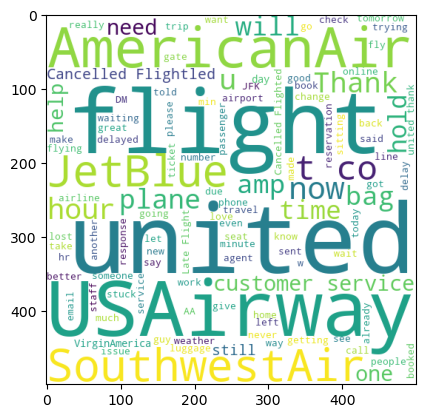

In [28]:
df_wc = create_Cloud(data, "text")

fig, ax = plt.subplots()
ax.imshow(df_wc)

In [29]:
type(data["negativereason"][0])

float

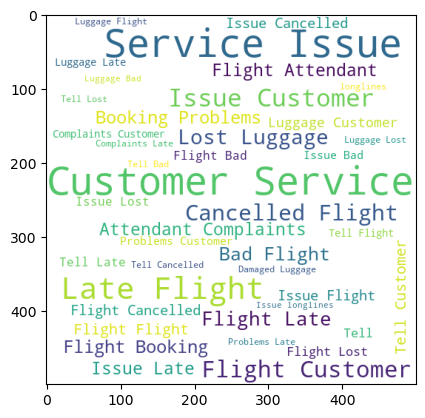

In [30]:
df_wc = create_Cloud(data, "negativereason")

fig, ax = plt.subplots()
ax.imshow(df_wc)

PreProcessing Text

In [31]:
''' 
Basic 5 steps for preprocessing we are following
    1. Tokenization
    2. Stemming
    3. Lowercasing
    4. Clean Text
    5. spelling correct
    6. rermove stop words
'''

texts = list(data["text"].copy())


In [32]:
!pip install pyspellchecker

In [33]:
from spellchecker import SpellChecker

def corrected_Spells_Percentage(text):
    spell = SpellChecker()
    words = text.split()
    misspelled = spell.unknown(words)
    return ((len(words) - len(misspelled)) / len(words))*100

In [34]:
print(corrected_Spells_Percentage(" ".join(texts)))
"""
    No need to correct spellings since most of the spelling
    are corrected. And since it is a tweets data we are not correct thest spellings.
"""

92.75144199252918


'\n    No need to correct spellings since most of the spelling\n    are corrected. And since it is a tweets data we are not correct thest spellings.\n'

In [42]:
from nltk.stem import PorterStemmer

def preprocessing(data):
    Stopwords = set(stopwords.words('english'))
    special_char_patterns = r'[^a-zA-Z0-9\s]'
    urlPatterns = r'http\S+|www\S+'
    Stemmer = PorterStemmer()
    Pre_Processed_Data = []


    for text in data:

        try:
            text = re.sub(special_char_patterns, '', text)
            text = re.sub(urlPatterns, '' , text)

        except TypeError:
            return

        lst = []

        for word in text.split():
            if word not in Stopwords and word != ' ':
                lst.append(Stemmer.stem(word))
            else:
                lst.append(word)

        Pre_Processed_Data.append(" ".join(lst))

    return Pre_Processed_Data

In [43]:
pre_processed_data = preprocessing(texts)

In [44]:
pre_processed_data

['virginamerica what dhepburn said',
 'virginamerica plu youv ad commerci to the experi tacki',
 'virginamerica i didnt today must mean i need to take anoth trip',
 'virginamerica its realli aggress to blast obnoxi entertain in your guest face amp they have littl recours',
 'virginamerica and its a realli big bad thing about it',
 'virginamerica serious would pay 30 a flight for seat that didnt have this play its realli the only bad thing about fli va',
 'virginamerica ye nearli everi time i fli vx this ear worm wont go away',
 'virginamerica realli miss a prime opportun for men without hat parodi there',
 'virginamerica well i didntbut now i do d',
 'virginamerica it was amaz and arriv an hour earli your too good to me',
 'virginamerica did you know that suicid is the second lead caus of death among teen 1024',
 'virginamerica i lt3 pretti graphic so much better than minim iconographi d',
 'virginamerica thi is such a great deal alreadi think about my 2nd trip to australia amp i haven

In [56]:
# Feature Extraction using tf-idf and modeling
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=30000)
X = vectorizer.fit_transform(pre_processed_data)

In [73]:
dense_array = X.toarray()

In [118]:
data['airline_sentiment'].replace({'negative': 1, 'neutral':2, "positive":3}, inplace=True)

In [119]:
from sklearn.model_selection import train_test_split
Y = data["airline_sentiment"].copy()
X_train, X_test, y_train, y_test = train_test_split(dense_array, Y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_val)
accuracy_score(predictions, y_val)

0.7046186895810956

In [92]:
clf.score(X_train, y_train)

0.7428896473265074

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(LogisticRegression(multi_class="ovr", penalty="l2"), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 3, 5, 10]})

In [100]:
best_model = grid_search.best_estimator_

In [102]:
best_model.fit(X_train, y_train)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression(C=5, multi_class='ovr')

In [122]:
predictions = best_model.predict(X_val)
accuracy_score(predictions, y_val)

0.9183673469387755

In [123]:
best_model.score(X_train, y_train)

0.9221653394008342

In [124]:
from sklearn.tree import DecisionTreeClassifier

decision_clf = DecisionTreeClassifier(max_depth=50, min_samples_split=10,min_samples_leaf=1)
decision_clf.fit(X_train, y_train)
predictions = decision_clf.predict(X_val)
accuracy_score(predictions, y_val)

0.6928034371643395

So after trying out differernt models logistic regression gives us the best accuracy of 92 percent. Now lets check how our best logistic regression works on unseen test data

|

In [125]:
test_predictions = best_model.predict(X_test)

In [126]:
accuracy_score(test_predictions, y_test)

0.9228662711090826